In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [13]:
data_org = pd.read_csv('https://raw.githubusercontent.com/SajjadAemmi/PyLearn/main/6.MachineLearning/House-Prices/train.csv')
data_org

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# preprocess

In [14]:
data = data_org.copy()
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['MasVnrArea'].fillna(0, inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)

### numerical features

In [15]:
numerical_data = data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                 'MiscVal', 'MoSold', 'YrSold']]
numerical_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,150,856,...,2,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,284,1262,...,2,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,434,920,...,2,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,540,756,...,3,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,490,1145,...,3,192,84,0,0,0,0,0,12,2008


### categorical features

In [16]:
from sklearn.preprocessing import LabelEncoder

categorical_data = data[['MSZoning', 'Street', 'Alley', 'LotShape', 'Utilities', 'LandSlope',
                         'Neighborhood', 'Condition1', 'Condition1', 'RoofStyle', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                         'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
                         'GarageQual', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']].apply(LabelEncoder().fit_transform)
categorical_data.head()

,MSZoning,Street,Alley,LotShape,Utilities,LandSlope,Neighborhood,Condition1,Condition1,RoofStyle,...,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,0,0,5,2,2,1,...,5,1,1,4,2,3,4,4,8,4
1,3,1,2,3,0,0,24,1,1,1,...,4,1,1,4,2,3,4,4,8,4
2,3,1,2,0,0,0,5,2,2,1,...,4,1,1,4,2,3,4,4,8,4
3,3,1,2,0,0,0,6,2,2,1,...,2,5,2,4,2,3,4,4,8,0
4,3,1,2,0,0,0,15,2,2,1,...,4,1,1,4,2,3,4,4,8,4


### train and validation

In [17]:
x = pd.concat([numerical_data, categorical_data], axis=1)
y = data['SalePrice']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=.2)

# model

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2048, 'relu', input_shape=(64,) ),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(256, 'relu' ),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64, 'relu' ),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(16, 'relu' ),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1, 'linear')
])
model.compile(tf.keras.optimizers.Adam(.0001), tf.keras.losses.mae)
output = model.fit(x_train, y_train, epochs=4000, validation_data=(x_valid, y_valid))

Streaming output truncated to the last 5000 lines.
37/37 [==============================] - 1s 26ms/step - loss: 12543.2354 - val_loss: 16265.0801
Epoch 1502/4000
37/37 [==============================] - 1s 25ms/step - loss: 13375.0098 - val_loss: 16587.6582
Epoch 1503/4000
37/37 [==============================] - 1s 24ms/step - loss: 12900.9473 - val_loss: 16326.7070
Epoch 1504/4000
37/37 [==============================] - 1s 27ms/step - loss: 13414.5947 - val_loss: 16139.6914
Epoch 1505/4000
37/37 [==============================] - 1s 18ms/step - loss: 13188.9512 - val_loss: 16370.3389
Epoch 1506/4000
37/37 [==============================] - 1s 17ms/step - loss: 13264.6641 - val_loss: 15944.0615
Epoch 1507/4000
37/37 [==============================] - 1s 18ms/step - loss: 12664.8857 - val_loss: 16001.4521
Epoch 1508/4000
37/37 [==============================] - 1s 18ms/step - loss: 12663.9365 - val_loss: 15936.6641
Epoch 1509/4000
37/37 [==============================] - 1s 18ms/step

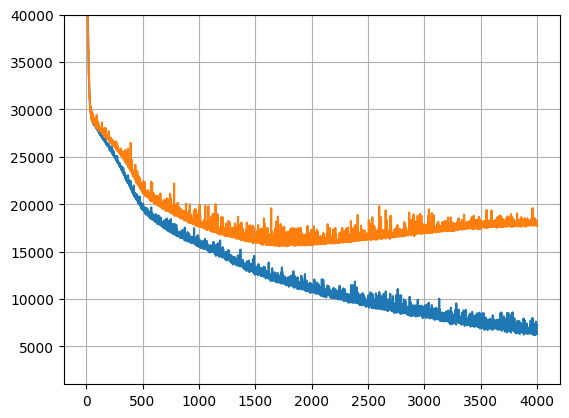

In [24]:
import matplotlib.pyplot as plt
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.ylim([1000,40000])
plt.grid()

#### early stop

In [28]:
model_opt = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2048, 'relu', input_shape=(64,) ),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(256, 'relu' ),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64, 'relu' ),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(16, 'relu' ),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1, 'linear')
])
model_opt.compile(tf.keras.optimizers.Adam(.0001), tf.keras.losses.mae)
output = model_opt.fit(x_train, y_train, epochs=1700, validation_data=(x_valid, y_valid))

Epoch 1/1700
37/37 [==============================] - 2s 18ms/step - loss: 179651.2188 - val_loss: 172521.4062
Epoch 2/1700
37/37 [==============================] - 1s 15ms/step - loss: 170466.4531 - val_loss: 156678.8750
Epoch 3/1700
37/37 [==============================] - 1s 14ms/step - loss: 138803.7344 - val_loss: 102366.6719
Epoch 4/1700
37/37 [==============================] - 1s 14ms/step - loss: 71181.0078 - val_loss: 51689.1523
Epoch 5/1700
37/37 [==============================] - 1s 14ms/step - loss: 51958.6172 - val_loss: 49820.9531
Epoch 6/1700
37/37 [==============================] - 1s 14ms/step - loss: 49819.7969 - val_loss: 48312.4922
Epoch 7/1700
37/37 [==============================] - 1s 15ms/step - loss: 48326.9961 - val_loss: 47052.7734
Epoch 8/1700
37/37 [==============================] - 1s 15ms/step - loss: 46854.7969 - val_loss: 45643.8750
Epoch 9/1700
37/37 [==============================] - 1s 14ms/step - loss: 45545.1562 - val_loss: 44449.1602
Epoch 10/1700

In [30]:
model_opt.evaluate(x_valid, y_valid)

10/10 [==============================] - 0s 3ms/step - loss: 15598.7549


15598.7548828125

In [31]:
model_opt.save('model.h5')